In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, KFold, GroupKFold
import time

In [2]:
train = pd.read_csv("G:/JOB-A-Thon/train_Df64byy.csv")

test = pd.read_csv("G:/JOB-A-Thon/test_YCcRUnU.csv")

sub = pd.read_csv("G:/JOB-A-Thon/sample_submission_QrCyCoT.csv")

In [3]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [4]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [5]:
sub.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [6]:
train.shape

(50882, 14)

In [7]:
test.shape

(21805, 13)

In [8]:
sub.shape

(21805, 2)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [11]:
train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [12]:
test.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
count,21805.000000,21805.000000,21805.000000,21805.000000,13202.000000,21805.000000,21805.000000
mean,61785.000000,1748.737491,44.877734,42.748085,2.440085,15.138363,14220.306581
std,6294.705646,1438.358949,17.254898,17.269112,1.037627,6.302805,6497.996164
min,50883.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2152.000000
25%,56334.000000,535.000000,28.000000,27.000000,1.000000,12.000000,9285.000000
50%,61785.000000,1392.000000,44.000000,41.000000,3.000000,17.000000,13244.000000
75%,67236.000000,2712.000000,59.000000,57.000000,3.000000,20.000000,18201.600000
max,72687.000000,6185.000000,75.000000,75.000000,4.000000,22.000000,43776.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


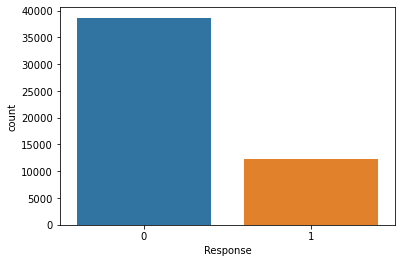

In [13]:
sns.countplot(train['Response'])
plt.show()

In [14]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [15]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [16]:
float(100.0*11691/50882)

22.97669116780001

In [17]:
train['Health Indicator'].value_counts(normalize=True)

X1    0.331964
X2    0.263632
X3    0.172540
X4    0.146539
X5    0.044066
X6    0.032661
X7    0.005001
X8    0.001990
X9    0.001608
Name: Health Indicator, dtype: float64

In [18]:
Health_Indicator_mode = train["Health Indicator"].mode()[0]

Health_Indicator_mode

'X1'

In [19]:
train["Health Indicator"].fillna(Health_Indicator_mode, inplace=True)

In [20]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [21]:
float(100.0*20251/50882)

39.799929248064146

In [22]:
train['Holding_Policy_Type'].value_counts(normalize=True)

3.0    0.433515
1.0    0.266821
2.0    0.163397
4.0    0.136267
Name: Holding_Policy_Type, dtype: float64

In [23]:
Holding_Policy_Type_mode = train["Holding_Policy_Type"].mode()[0]

Holding_Policy_Type_mode

3.0

In [24]:
train["Holding_Policy_Type"].fillna(Holding_Policy_Type_mode, inplace=True)

In [25]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration    20251
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [26]:
train['Holding_Policy_Duration'].value_counts(normalize=True)

1.0     0.146877
14+     0.141523
2.0     0.139075
3.0     0.117071
4.0     0.090464
5.0     0.077111
6.0     0.061833
7.0     0.053704
8.0     0.042963
9.0     0.036368
10.0    0.026542
11.0    0.017825
12.0    0.016748
13.0    0.016682
14.0    0.015213
Name: Holding_Policy_Duration, dtype: float64

In [27]:
Holding_Policy_Duration_mode = train["Holding_Policy_Duration"].mode()[0]

Holding_Policy_Duration_mode

'1.0'

In [28]:
train["Holding_Policy_Duration"].fillna(Holding_Policy_Duration_mode, inplace=True)

In [29]:
train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

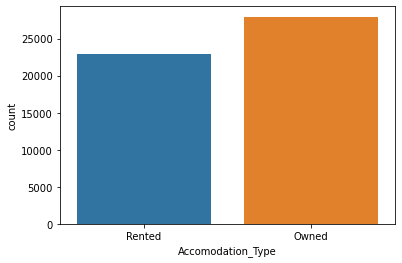

In [30]:
sns.countplot(train['Accomodation_Type'])

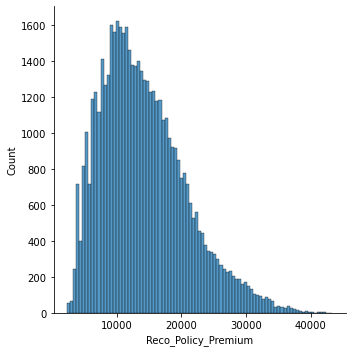

In [31]:
sns.displot(train['Reco_Policy_Premium'])

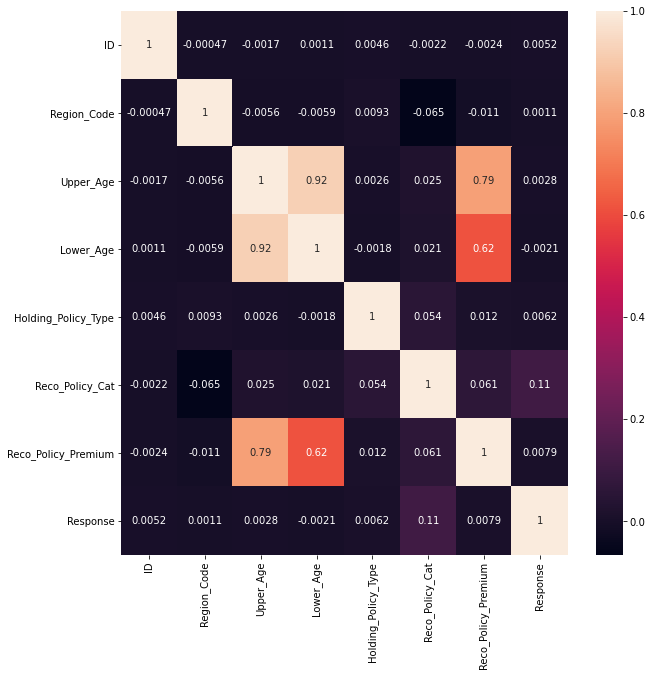

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True);

In [33]:
### removing the null value from the test dataset

In [34]:
test['Health Indicator'].value_counts(normalize=True)

X1    0.334605
X2    0.269162
X3    0.169627
X4    0.145548
X5    0.040589
X6    0.030635
X7    0.005722
X8    0.002444
X9    0.001669
Name: Health Indicator, dtype: float64

In [35]:
Health_Indicator_test_mode = test["Health Indicator"].mode()[0]

Health_Indicator_test_mode

'X1'

In [36]:
test["Health Indicator"].fillna(Health_Indicator_test_mode, inplace=True)

In [37]:
test['Holding_Policy_Duration'].value_counts(normalize=True)

14+     0.143312
1.0     0.143236
2.0     0.134222
3.0     0.121648
4.0     0.091274
5.0     0.075140
6.0     0.068399
7.0     0.050295
8.0     0.043100
9.0     0.037343
10.0    0.025223
11.0    0.019240
13.0    0.016740
14.0    0.015982
12.0    0.014846
Name: Holding_Policy_Duration, dtype: float64

In [38]:
Holding_Policy_Duration_test_mode = test["Holding_Policy_Duration"].mode()[0]

Holding_Policy_Duration_test_mode

'14+'

In [39]:
test["Holding_Policy_Duration"].fillna(Holding_Policy_Duration_test_mode, inplace=True)

In [40]:
test['Holding_Policy_Type'].value_counts(normalize=True)

3.0    0.422057
1.0    0.270717
2.0    0.162854
4.0    0.144372
Name: Holding_Policy_Type, dtype: float64

In [41]:
Holding_Policy_Type_test_mode = test["Holding_Policy_Type"].mode()[0]

Holding_Policy_Type_test_mode

3.0

In [42]:
test["Holding_Policy_Type"].fillna(Holding_Policy_Type_test_mode, inplace=True)

In [43]:
test.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

In [44]:
## Combining the the data

In [45]:
y = train['Response']

In [46]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

In [47]:
ntrain = train.shape[0]
ntest = test.shape[0]

In [48]:
all_data =pd.concat((train, test)).reset_index(drop = True) 

In [49]:
all_data.shape

(72687, 14)

In [50]:
all_data = all_data.drop(['Response', 'Is_Spouse'], axis=1)

In [51]:
all_data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,1,C3,3213,Rented,Individual,36,36,X1,14+,3.0,22,11628.0
1,2,C5,1117,Owned,Joint,75,22,X2,1.0,3.0,22,30510.0
2,3,C5,3732,Owned,Individual,32,32,X1,1.0,1.0,19,7450.0
3,4,C24,4378,Owned,Joint,52,48,X1,14+,3.0,19,17780.0
4,5,C8,2190,Rented,Individual,44,44,X2,3.0,1.0,16,10404.0
...,...,...,...,...,...,...,...,...,...,...,...,...
72682,72683,C3,1044,Owned,Individual,45,45,X1,4.0,1.0,18,15884.0
72683,72684,C4,266,Owned,Individual,59,59,X5,6.0,3.0,18,21390.0
72684,72685,C12,2470,Owned,Individual,74,74,X3,14+,3.0,1,17836.0
72685,72686,C10,1676,Rented,Individual,25,25,X4,3.0,1.0,19,11568.0


In [52]:
all_data.Reco_Insurance_Type.unique()

array(['Individual', 'Joint'], dtype=object)

In [53]:
all_data.City_Code+' '+all_data.Reco_Insurance_Type

0         C3 Individual
1              C5 Joint
2         C5 Individual
3             C24 Joint
4         C8 Individual
              ...      
72682     C3 Individual
72683     C4 Individual
72684    C12 Individual
72685    C10 Individual
72686     C2 Individual
Length: 72687, dtype: object

In [54]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72687 entries, 0 to 72686
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       72687 non-null  int64  
 1   City_Code                72687 non-null  object 
 2   Region_Code              72687 non-null  int64  
 3   Accomodation_Type        72687 non-null  object 
 4   Reco_Insurance_Type      72687 non-null  object 
 5   Upper_Age                72687 non-null  int64  
 6   Lower_Age                72687 non-null  int64  
 7   Health Indicator         72687 non-null  object 
 8   Holding_Policy_Duration  72687 non-null  object 
 9   Holding_Policy_Type      72687 non-null  float64
 10  Reco_Policy_Cat          72687 non-null  int64  
 11  Reco_Policy_Premium      72687 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 6.7+ MB


In [55]:
np.unique((all_data.Upper_Age//10).astype(str)+all_data['Health Indicator'])

array(['1X1', '1X2', '1X3', '1X4', '1X5', '1X6', '1X7', '1X8', '1X9',
       '2X1', '2X2', '2X3', '2X4', '2X5', '2X6', '2X7', '2X8', '2X9',
       '3X1', '3X2', '3X3', '3X4', '3X5', '3X6', '3X7', '3X8', '3X9',
       '4X1', '4X2', '4X3', '4X4', '4X5', '4X6', '4X7', '4X8', '4X9',
       '5X1', '5X2', '5X3', '5X4', '5X5', '5X6', '5X7', '5X8', '5X9',
       '6X1', '6X2', '6X3', '6X4', '6X5', '6X6', '6X7', '6X8', '6X9',
       '7X1', '7X2', '7X3', '7X4', '7X5', '7X6', '7X7', '7X8', '7X9'],
      dtype=object)

In [56]:
(all_data.Reco_Policy_Cat//10).astype(str)+' '+all_data['Health Indicator']

0        2 X1
1        2 X2
2        1 X1
3        1 X1
4        1 X2
         ... 
72682    1 X1
72683    1 X5
72684    0 X3
72685    1 X4
72686    0 X2
Length: 72687, dtype: object

In [57]:
(all_data.Region_Code//10).astype(str)+' '+all_data['Accomodation_Type']

0        321 Rented
1         111 Owned
2         373 Owned
3         437 Owned
4        219 Rented
            ...    
72682     104 Owned
72683      26 Owned
72684     247 Owned
72685    167 Rented
72686     361 Owned
Length: 72687, dtype: object

In [58]:
all_data['mean_premium_per_region_code'] = all_data.groupby('Region_Code')['Reco_Policy_Premium'].transform('mean')

all_data['mean_premium_Reco_Policy_Cat'] = all_data.groupby('Reco_Policy_Cat')['Reco_Policy_Premium'].transform('mean')

all_data['mean_premium_Upper_Age'] = all_data.groupby('Upper_Age')['Reco_Policy_Premium'].transform('mean')

all_data['mean_premium_Lower_Age'] = all_data.groupby('Lower_Age')['Reco_Policy_Premium'].transform('mean')

all_data['mean_premium_Holding_Policy_Type'] = all_data.groupby('Holding_Policy_Type')['Reco_Policy_Premium'].transform('mean')

In [59]:
all_data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,mean_premium_per_region_code,mean_premium_Reco_Policy_Cat,mean_premium_Upper_Age,mean_premium_Lower_Age,mean_premium_Holding_Policy_Type
0,1,C3,3213,Rented,Individual,36,36,X1,14+,3.0,22,11628.0,12130.080000,14589.814674,11897.521201,12344.261351,13740.303578
1,2,C5,1117,Owned,Joint,75,22,X2,1.0,3.0,22,30510.0,16076.342857,14589.814674,23286.775041,8848.816462,13740.303578
2,3,C5,3732,Owned,Individual,32,32,X1,1.0,1.0,19,7450.0,11336.000000,14714.576838,10158.354717,10983.887528,14404.622423
3,4,C24,4378,Owned,Joint,52,48,X1,14+,3.0,19,17780.0,14329.200000,14714.576838,16365.677299,15053.030179,13740.303578
4,5,C8,2190,Rented,Individual,44,44,X2,3.0,1.0,16,10404.0,16664.157143,14264.687867,13523.956453,13841.541389,14404.622423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72682,72683,C3,1044,Owned,Individual,45,45,X1,4.0,1.0,18,15884.0,13876.583333,14662.230748,14787.071076,14645.381161,14404.622423
72683,72684,C4,266,Owned,Individual,59,59,X5,6.0,3.0,18,21390.0,12720.573684,14662.230748,17750.819823,17697.004665,13740.303578
72684,72685,C12,2470,Owned,Individual,74,74,X3,14+,3.0,1,17836.0,13974.133333,12876.317189,22439.655657,22032.731849,13740.303578
72685,72686,C10,1676,Rented,Individual,25,25,X4,3.0,1.0,19,11568.0,12635.666667,14714.576838,8548.697187,9445.846769,14404.622423


In [60]:
all_data.groupby('Reco_Insurance_Type').agg({'Reco_Policy_Premium':'mean'})

,Reco_Policy_Premium
Reco_Insurance_Type,
Individual,12222.127892
Joint,21904.215827


In [61]:
all_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,mean_premium_per_region_code,mean_premium_Reco_Policy_Cat,mean_premium_Upper_Age,mean_premium_Lower_Age,mean_premium_Holding_Policy_Type
0,1,C3,3213,Rented,Individual,36,36,X1,14+,3.0,22,11628.0,12130.080000,14589.814674,11897.521201,12344.261351,13740.303578
1,2,C5,1117,Owned,Joint,75,22,X2,1.0,3.0,22,30510.0,16076.342857,14589.814674,23286.775041,8848.816462,13740.303578
2,3,C5,3732,Owned,Individual,32,32,X1,1.0,1.0,19,7450.0,11336.000000,14714.576838,10158.354717,10983.887528,14404.622423
3,4,C24,4378,Owned,Joint,52,48,X1,14+,3.0,19,17780.0,14329.200000,14714.576838,16365.677299,15053.030179,13740.303578
4,5,C8,2190,Rented,Individual,44,44,X2,3.0,1.0,16,10404.0,16664.157143,14264.687867,13523.956453,13841.541389,14404.622423


In [62]:
City_Code = all_data[['City_Code']]

City_Code = pd.get_dummies(City_Code, drop_first=True)

City_Code

,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,...,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
72684,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72685,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
Accomodation_Type = all_data[['Accomodation_Type']]
Accomodation_Type = pd.get_dummies(Accomodation_Type, drop_first=True)
Accomodation_Type.head()

,Accomodation_Type_Rented
0,1
1,0
2,0
3,0
4,1


In [64]:
Reco_Insurance_Type = all_data[['Reco_Insurance_Type']]
Reco_Insurance_Type = pd.get_dummies(Reco_Insurance_Type, drop_first=True)
Reco_Insurance_Type.head()

,Reco_Insurance_Type_Joint
0,0
1,1
2,0
3,1
4,0


In [65]:
Holding_Policy_Type = all_data[['Holding_Policy_Type']]
Holding_Policy_Type = pd.get_dummies(Holding_Policy_Type, drop_first = True)
Holding_Policy_Type

,Holding_Policy_Type
0,3.0
1,3.0
2,1.0
3,3.0
4,1.0
...,...
72682,1.0
72683,3.0
72684,3.0
72685,1.0


In [66]:
all_data['Holding_Policy_Duration'].unique()

array(['14+', '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0', '11.0',
       '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [67]:
from sklearn import preprocessing

In [68]:
label_encoder = preprocessing.LabelEncoder()

In [69]:
all_data['Holding_Policy_Duration']=label_encoder.fit_transform(all_data['Holding_Policy_Duration'])

In [70]:
all_data['Holding_Policy_Duration'].unique()

array([ 5,  0,  8, 10, 14,  6, 12,  7,  2,  1, 13, 11,  9,  4,  3])

In [71]:
all_data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,mean_premium_per_region_code,mean_premium_Reco_Policy_Cat,mean_premium_Upper_Age,mean_premium_Lower_Age,mean_premium_Holding_Policy_Type
0,1,C3,3213,Rented,Individual,36,36,X1,5,3.0,22,11628.0,12130.080000,14589.814674,11897.521201,12344.261351,13740.303578
1,2,C5,1117,Owned,Joint,75,22,X2,0,3.0,22,30510.0,16076.342857,14589.814674,23286.775041,8848.816462,13740.303578
2,3,C5,3732,Owned,Individual,32,32,X1,0,1.0,19,7450.0,11336.000000,14714.576838,10158.354717,10983.887528,14404.622423
3,4,C24,4378,Owned,Joint,52,48,X1,5,3.0,19,17780.0,14329.200000,14714.576838,16365.677299,15053.030179,13740.303578
4,5,C8,2190,Rented,Individual,44,44,X2,8,1.0,16,10404.0,16664.157143,14264.687867,13523.956453,13841.541389,14404.622423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72682,72683,C3,1044,Owned,Individual,45,45,X1,9,1.0,18,15884.0,13876.583333,14662.230748,14787.071076,14645.381161,14404.622423
72683,72684,C4,266,Owned,Individual,59,59,X5,11,3.0,18,21390.0,12720.573684,14662.230748,17750.819823,17697.004665,13740.303578
72684,72685,C12,2470,Owned,Individual,74,74,X3,5,3.0,1,17836.0,13974.133333,12876.317189,22439.655657,22032.731849,13740.303578
72685,72686,C10,1676,Rented,Individual,25,25,X4,8,1.0,19,11568.0,12635.666667,14714.576838,8548.697187,9445.846769,14404.622423


In [72]:
final_data = pd.concat([all_data, City_Code, Accomodation_Type, Reco_Insurance_Type, Holding_Policy_Type], axis=1)

In [73]:
final_data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,...,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Holding_Policy_Type
0,1,C3,3213,Rented,Individual,36,36,X1,5,3.0,...,0,0,0,0,0,0,0,1,0,3.0
1,2,C5,1117,Owned,Joint,75,22,X2,0,3.0,...,0,0,1,0,0,0,0,0,1,3.0
2,3,C5,3732,Owned,Individual,32,32,X1,0,1.0,...,0,0,1,0,0,0,0,0,0,1.0
3,4,C24,4378,Owned,Joint,52,48,X1,5,3.0,...,0,0,0,0,0,0,0,0,1,3.0
4,5,C8,2190,Rented,Individual,44,44,X2,8,1.0,...,0,0,0,0,0,1,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72682,72683,C3,1044,Owned,Individual,45,45,X1,9,1.0,...,0,0,0,0,0,0,0,0,0,1.0
72683,72684,C4,266,Owned,Individual,59,59,X5,11,3.0,...,0,1,0,0,0,0,0,0,0,3.0
72684,72685,C12,2470,Owned,Individual,74,74,X3,5,3.0,...,0,0,0,0,0,0,0,0,0,3.0
72685,72686,C10,1676,Rented,Individual,25,25,X4,8,1.0,...,0,0,0,0,0,0,0,1,0,1.0


In [74]:
final_data.drop(['ID', 'City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Holding_Policy_Type'], axis=1, inplace=True)

In [75]:
final_data.head()

,Region_Code,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,mean_premium_per_region_code,mean_premium_Reco_Policy_Cat,mean_premium_Upper_Age,...,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Accomodation_Type_Rented,Reco_Insurance_Type_Joint
0,3213,36,36,X1,5,22,11628.0,12130.080000,14589.814674,11897.521201,...,0,0,0,0,0,0,0,0,1,0
1,1117,75,22,X2,0,22,30510.0,16076.342857,14589.814674,23286.775041,...,0,0,0,1,0,0,0,0,0,1
2,3732,32,32,X1,0,19,7450.0,11336.000000,14714.576838,10158.354717,...,0,0,0,1,0,0,0,0,0,0
3,4378,52,48,X1,5,19,17780.0,14329.200000,14714.576838,16365.677299,...,0,0,0,0,0,0,0,0,0,1
4,2190,44,44,X2,8,16,10404.0,16664.157143,14264.687867,13523.956453,...,0,0,0,0,0,0,1,0,1,0


In [76]:
final_data['Health Indicator']=label_encoder.fit_transform(final_data['Health Indicator'])

In [77]:
final_data['Health Indicator'].unique()

array([0, 1, 3, 2, 5, 4, 7, 6, 8])

In [78]:
final_data

,Region_Code,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,mean_premium_per_region_code,mean_premium_Reco_Policy_Cat,mean_premium_Upper_Age,...,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Accomodation_Type_Rented,Reco_Insurance_Type_Joint
0,3213,36,36,0,5,22,11628.0,12130.080000,14589.814674,11897.521201,...,0,0,0,0,0,0,0,0,1,0
1,1117,75,22,1,0,22,30510.0,16076.342857,14589.814674,23286.775041,...,0,0,0,1,0,0,0,0,0,1
2,3732,32,32,0,0,19,7450.0,11336.000000,14714.576838,10158.354717,...,0,0,0,1,0,0,0,0,0,0
3,4378,52,48,0,5,19,17780.0,14329.200000,14714.576838,16365.677299,...,0,0,0,0,0,0,0,0,0,1
4,2190,44,44,1,8,16,10404.0,16664.157143,14264.687867,13523.956453,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72682,1044,45,45,0,9,18,15884.0,13876.583333,14662.230748,14787.071076,...,0,0,0,0,0,0,0,0,0,0
72683,266,59,59,4,11,18,21390.0,12720.573684,14662.230748,17750.819823,...,0,0,1,0,0,0,0,0,0,0
72684,2470,74,74,2,5,1,17836.0,13974.133333,12876.317189,22439.655657,...,0,0,0,0,0,0,0,0,0,0
72685,1676,25,25,3,8,19,11568.0,12635.666667,14714.576838,8548.697187,...,0,0,0,0,0,0,0,0,1,0


In [79]:
trainX = final_data[:ntrain]
testX = final_data[ntrain:]

In [80]:
trainX.shape, testX.shape

((50882, 49), (21805, 49))

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(trainX, y, test_size = 0.30, random_state = 101)

In [83]:
xgb = XGBClassifier(n_estimators=150)

In [84]:
xgb.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
pred = xgb.predict(X_test)

In [86]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
xgb.score(X_train, y_train)

0.8279192520425639

In [87]:
xgb.score(X_test, y_test)

0.7618735669832951

In [88]:
lgbm = LGBMClassifier(n_estimators=150)

In [89]:
lgbm.fit(X_train, y_train)

LGBMClassifier(n_estimators=150)

In [90]:
pred1 = lgbm.predict(X_test)

In [91]:
lgbm.score(X_test, y_test)

0.7650835244022273

In [92]:
catb = CatBoostClassifier(depth=9, l2_leaf_reg=50)

In [93]:
catb.fit(X_train, y_train)

0:	learn: 0.6831794	total: 167ms	remaining: 2m 47s
1:	learn: 0.6734636	total: 256ms	remaining: 2m 7s
2:	learn: 0.6645396	total: 351ms	remaining: 1m 56s
3:	learn: 0.6569282	total: 498ms	remaining: 2m 4s
4:	learn: 0.6493549	total: 651ms	remaining: 2m 9s
5:	learn: 0.6427084	total: 786ms	remaining: 2m 10s
6:	learn: 0.6356959	total: 895ms	remaining: 2m 6s
7:	learn: 0.6298532	total: 982ms	remaining: 2m 1s
8:	learn: 0.6242030	total: 1.06s	remaining: 1m 56s
9:	learn: 0.6188325	total: 1.15s	remaining: 1m 54s
10:	learn: 0.6135396	total: 1.24s	remaining: 1m 51s
11:	learn: 0.6084861	total: 1.31s	remaining: 1m 48s
12:	learn: 0.6041169	total: 1.42s	remaining: 1m 48s
13:	learn: 0.5998547	total: 1.52s	remaining: 1m 46s
14:	learn: 0.5957854	total: 1.62s	remaining: 1m 46s
15:	learn: 0.5923483	total: 1.7s	remaining: 1m 44s
16:	learn: 0.5887734	total: 1.8s	remaining: 1m 44s
17:	learn: 0.5858200	total: 1.88s	remaining: 1m 42s
18:	learn: 0.5823142	total: 1.98s	remaining: 1m 42s
19:	learn: 0.5795519	total: 2

158:	learn: 0.5109651	total: 12.4s	remaining: 1m 5s
159:	learn: 0.5108791	total: 12.5s	remaining: 1m 5s
160:	learn: 0.5107948	total: 12.6s	remaining: 1m 5s
161:	learn: 0.5106983	total: 12.6s	remaining: 1m 5s
162:	learn: 0.5105732	total: 12.7s	remaining: 1m 5s
163:	learn: 0.5104403	total: 12.7s	remaining: 1m 4s
164:	learn: 0.5103619	total: 12.8s	remaining: 1m 4s
165:	learn: 0.5102186	total: 12.9s	remaining: 1m 4s
166:	learn: 0.5101093	total: 12.9s	remaining: 1m 4s
167:	learn: 0.5100294	total: 13s	remaining: 1m 4s
168:	learn: 0.5098814	total: 13s	remaining: 1m 4s
169:	learn: 0.5097808	total: 13.1s	remaining: 1m 3s
170:	learn: 0.5096696	total: 13.2s	remaining: 1m 3s
171:	learn: 0.5095598	total: 13.2s	remaining: 1m 3s
172:	learn: 0.5094560	total: 13.3s	remaining: 1m 3s
173:	learn: 0.5093265	total: 13.4s	remaining: 1m 3s
174:	learn: 0.5092272	total: 13.4s	remaining: 1m 3s
175:	learn: 0.5091450	total: 13.5s	remaining: 1m 3s
176:	learn: 0.5089946	total: 13.6s	remaining: 1m 3s
177:	learn: 0.50

320:	learn: 0.4956873	total: 23.7s	remaining: 50.1s
321:	learn: 0.4955756	total: 23.8s	remaining: 50s
322:	learn: 0.4955085	total: 23.8s	remaining: 49.9s
323:	learn: 0.4954331	total: 23.9s	remaining: 49.8s
324:	learn: 0.4953519	total: 23.9s	remaining: 49.7s
325:	learn: 0.4953053	total: 24s	remaining: 49.6s
326:	learn: 0.4952563	total: 24.1s	remaining: 49.5s
327:	learn: 0.4950896	total: 24.1s	remaining: 49.4s
328:	learn: 0.4950375	total: 24.2s	remaining: 49.3s
329:	learn: 0.4949018	total: 24.2s	remaining: 49.2s
330:	learn: 0.4947851	total: 24.3s	remaining: 49.1s
331:	learn: 0.4946344	total: 24.4s	remaining: 49s
332:	learn: 0.4945054	total: 24.4s	remaining: 49s
333:	learn: 0.4944237	total: 24.5s	remaining: 48.9s
334:	learn: 0.4942952	total: 24.6s	remaining: 48.8s
335:	learn: 0.4942147	total: 24.6s	remaining: 48.6s
336:	learn: 0.4941150	total: 24.7s	remaining: 48.6s
337:	learn: 0.4940237	total: 24.7s	remaining: 48.5s
338:	learn: 0.4939405	total: 24.8s	remaining: 48.4s
339:	learn: 0.493845

480:	learn: 0.4816935	total: 33.7s	remaining: 36.4s
481:	learn: 0.4816174	total: 33.8s	remaining: 36.3s
482:	learn: 0.4815139	total: 33.9s	remaining: 36.3s
483:	learn: 0.4814217	total: 34s	remaining: 36.2s
484:	learn: 0.4813312	total: 34.1s	remaining: 36.2s
485:	learn: 0.4812260	total: 34.2s	remaining: 36.2s
486:	learn: 0.4812032	total: 34.3s	remaining: 36.1s
487:	learn: 0.4811207	total: 34.4s	remaining: 36.1s
488:	learn: 0.4810316	total: 34.5s	remaining: 36s
489:	learn: 0.4809298	total: 34.6s	remaining: 36s
490:	learn: 0.4808226	total: 34.6s	remaining: 35.9s
491:	learn: 0.4807903	total: 34.7s	remaining: 35.8s
492:	learn: 0.4807129	total: 34.8s	remaining: 35.8s
493:	learn: 0.4806643	total: 34.9s	remaining: 35.8s
494:	learn: 0.4805699	total: 35s	remaining: 35.7s
495:	learn: 0.4805426	total: 35.1s	remaining: 35.7s
496:	learn: 0.4804946	total: 35.2s	remaining: 35.6s
497:	learn: 0.4803809	total: 35.3s	remaining: 35.5s
498:	learn: 0.4803025	total: 35.3s	remaining: 35.5s
499:	learn: 0.480282

640:	learn: 0.4697947	total: 45.9s	remaining: 25.7s
641:	learn: 0.4696933	total: 45.9s	remaining: 25.6s
642:	learn: 0.4696460	total: 46s	remaining: 25.5s
643:	learn: 0.4695894	total: 46s	remaining: 25.4s
644:	learn: 0.4694916	total: 46.1s	remaining: 25.4s
645:	learn: 0.4693737	total: 46.2s	remaining: 25.3s
646:	learn: 0.4693248	total: 46.2s	remaining: 25.2s
647:	learn: 0.4692694	total: 46.3s	remaining: 25.2s
648:	learn: 0.4692107	total: 46.4s	remaining: 25.1s
649:	learn: 0.4691925	total: 46.4s	remaining: 25s
650:	learn: 0.4691139	total: 46.5s	remaining: 24.9s
651:	learn: 0.4689745	total: 46.6s	remaining: 24.9s
652:	learn: 0.4689329	total: 46.6s	remaining: 24.8s
653:	learn: 0.4688849	total: 46.7s	remaining: 24.7s
654:	learn: 0.4687629	total: 46.8s	remaining: 24.6s
655:	learn: 0.4686892	total: 46.8s	remaining: 24.6s
656:	learn: 0.4686339	total: 46.9s	remaining: 24.5s
657:	learn: 0.4685581	total: 47s	remaining: 24.4s
658:	learn: 0.4684768	total: 47s	remaining: 24.3s
659:	learn: 0.4683456	

801:	learn: 0.4587701	total: 59.7s	remaining: 14.7s
802:	learn: 0.4587084	total: 59.7s	remaining: 14.7s
803:	learn: 0.4586676	total: 59.8s	remaining: 14.6s
804:	learn: 0.4585568	total: 59.9s	remaining: 14.5s
805:	learn: 0.4584349	total: 60s	remaining: 14.4s
806:	learn: 0.4583796	total: 1m	remaining: 14.4s
807:	learn: 0.4583035	total: 1m	remaining: 14.3s
808:	learn: 0.4582346	total: 1m	remaining: 14.2s
809:	learn: 0.4582252	total: 1m	remaining: 14.1s
810:	learn: 0.4581939	total: 1m	remaining: 14.1s
811:	learn: 0.4581896	total: 1m	remaining: 14s
812:	learn: 0.4581419	total: 1m	remaining: 13.9s
813:	learn: 0.4580194	total: 1m	remaining: 13.8s
814:	learn: 0.4579588	total: 1m	remaining: 13.8s
815:	learn: 0.4579374	total: 1m	remaining: 13.7s
816:	learn: 0.4578810	total: 1m	remaining: 13.6s
817:	learn: 0.4578308	total: 1m	remaining: 13.5s
818:	learn: 0.4577169	total: 1m	remaining: 13.5s
819:	learn: 0.4576296	total: 1m	remaining: 13.4s
820:	learn: 0.4575647	total: 1m 1s	remaining: 13.3s
821:	l

960:	learn: 0.4489110	total: 1m 13s	remaining: 2.97s
961:	learn: 0.4488923	total: 1m 13s	remaining: 2.9s
962:	learn: 0.4487918	total: 1m 13s	remaining: 2.82s
963:	learn: 0.4486950	total: 1m 13s	remaining: 2.74s
964:	learn: 0.4486108	total: 1m 13s	remaining: 2.67s
965:	learn: 0.4485493	total: 1m 13s	remaining: 2.59s
966:	learn: 0.4484794	total: 1m 13s	remaining: 2.51s
967:	learn: 0.4484267	total: 1m 13s	remaining: 2.44s
968:	learn: 0.4483568	total: 1m 13s	remaining: 2.36s
969:	learn: 0.4482875	total: 1m 13s	remaining: 2.29s
970:	learn: 0.4482552	total: 1m 13s	remaining: 2.21s
971:	learn: 0.4481726	total: 1m 13s	remaining: 2.13s
972:	learn: 0.4481161	total: 1m 14s	remaining: 2.06s
973:	learn: 0.4480601	total: 1m 14s	remaining: 1.98s
974:	learn: 0.4479720	total: 1m 14s	remaining: 1.9s
975:	learn: 0.4479154	total: 1m 14s	remaining: 1.83s
976:	learn: 0.4478432	total: 1m 14s	remaining: 1.75s
977:	learn: 0.4477700	total: 1m 14s	remaining: 1.67s
978:	learn: 0.4477117	total: 1m 14s	remaining: 1

In [94]:
pred2 = catb.predict(X_test)

In [95]:
pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
catb.score(X_test, y_test)

0.7650180150671471

In [97]:
params = {
    "learning_rate"    :[0.03, 0.04, 0.05, 0.07, 0.08, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth"        :[3, 4, 5, 6, 7, 8, 9 ,10, 11, 12, 13, 14, 15 ,16, 17, 18, 19, 20],
    "min_child_weight" :[1, 3, 5, 7, 9],
    "gamma"            :[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    "colsample_bytree" :[0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
}

In [98]:
from sklearn.model_selection import RandomizedSearchCV 

In [99]:
random = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='roc_auc', cv=5, verbose=3)

In [100]:
random.fit(trainX, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=3, max_depth=15, learning_rate=0.08, gamma=0.1, colsample_bytree=0.35 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:45:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=3, max_depth=15, learning_rate=0.08, gamma=0.1, colsample_bytree=0.35, score=0.686, total=  21.5s
[CV] min_child_weight=3, max_depth=15, learning_rate=0.08, gamma=0.1, colsample_bytree=0.35 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.4s remaining:    0.0s
C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:45:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=3, max_depth=15, learning_rate=0.08, gamma=0.1, colsample_bytree=0.35, score=0.689, total=  18.4s
[CV] min_child_weight=3, max_depth=15, learning_rate=0.08, gamma=0.1, colsample_bytree=0.35 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   39.8s remaining:    0.0s
C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:45:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=3, max_depth=15, learning_rate=0.08, gamma=0.1, colsample_bytree=0.35, score=0.680, total=  21.1s
[CV] min_child_weight=3, max_depth=15, learning_rate=0.08, gamma=0.1, colsample_bytree=0.35 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:46:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=3, max_depth=15, learning_rate=0.08, gamma=0.1, colsample_bytree=0.35, score=0.683, total=  19.3s
[CV] min_child_weight=3, max_depth=15, learning_rate=0.08, gamma=0.1, colsample_bytree=0.35 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:46:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=3, max_depth=15, learning_rate=0.08, gamma=0.1, colsample_bytree=0.35, score=0.678, total=  20.2s
[CV] min_child_weight=3, max_depth=18, learning_rate=0.07, gamma=0.2, colsample_bytree=0.75 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:46:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=3, max_depth=18, learning_rate=0.07, gamma=0.2, colsample_bytree=0.75, score=0.699, total=  40.2s
[CV] min_child_weight=3, max_depth=18, learning_rate=0.07, gamma=0.2, colsample_bytree=0.75 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=3, max_depth=18, learning_rate=0.07, gamma=0.2, colsample_bytree=0.75, score=0.688, total=  41.1s
[CV] min_child_weight=3, max_depth=18, learning_rate=0.07, gamma=0.2, colsample_bytree=0.75 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=3, max_depth=18, learning_rate=0.07, gamma=0.2, colsample_bytree=0.75, score=0.690, total=  39.0s
[CV] min_child_weight=3, max_depth=18, learning_rate=0.07, gamma=0.2, colsample_bytree=0.75 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:48:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=3, max_depth=18, learning_rate=0.07, gamma=0.2, colsample_bytree=0.75, score=0.689, total=  40.9s
[CV] min_child_weight=3, max_depth=18, learning_rate=0.07, gamma=0.2, colsample_bytree=0.75 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=3, max_depth=18, learning_rate=0.07, gamma=0.2, colsample_bytree=0.75, score=0.683, total=  38.9s
[CV] min_child_weight=9, max_depth=4, learning_rate=0.15, gamma=0.4, colsample_bytree=0.85 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:50:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=9, max_depth=4, learning_rate=0.15, gamma=0.4, colsample_bytree=0.85, score=0.662, total=  10.6s
[CV] min_child_weight=9, max_depth=4, learning_rate=0.15, gamma=0.4, colsample_bytree=0.85 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=9, max_depth=4, learning_rate=0.15, gamma=0.4, colsample_bytree=0.85, score=0.657, total=  10.4s
[CV] min_child_weight=9, max_depth=4, learning_rate=0.15, gamma=0.4, colsample_bytree=0.85 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:50:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=9, max_depth=4, learning_rate=0.15, gamma=0.4, colsample_bytree=0.85, score=0.653, total=   9.7s
[CV] min_child_weight=9, max_depth=4, learning_rate=0.15, gamma=0.4, colsample_bytree=0.85 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=9, max_depth=4, learning_rate=0.15, gamma=0.4, colsample_bytree=0.85, score=0.662, total=  10.8s
[CV] min_child_weight=9, max_depth=4, learning_rate=0.15, gamma=0.4, colsample_bytree=0.85 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:50:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=9, max_depth=4, learning_rate=0.15, gamma=0.4, colsample_bytree=0.85, score=0.655, total=   8.6s
[CV] min_child_weight=9, max_depth=14, learning_rate=0.15, gamma=0.0, colsample_bytree=0.8 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=9, max_depth=14, learning_rate=0.15, gamma=0.0, colsample_bytree=0.8, score=0.674, total=  32.3s
[CV] min_child_weight=9, max_depth=14, learning_rate=0.15, gamma=0.0, colsample_bytree=0.8 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:51:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=9, max_depth=14, learning_rate=0.15, gamma=0.0, colsample_bytree=0.8, score=0.675, total=  29.4s
[CV] min_child_weight=9, max_depth=14, learning_rate=0.15, gamma=0.0, colsample_bytree=0.8 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:52:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=9, max_depth=14, learning_rate=0.15, gamma=0.0, colsample_bytree=0.8, score=0.671, total=  30.2s
[CV] min_child_weight=9, max_depth=14, learning_rate=0.15, gamma=0.0, colsample_bytree=0.8 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:52:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=9, max_depth=14, learning_rate=0.15, gamma=0.0, colsample_bytree=0.8, score=0.677, total=  31.3s
[CV] min_child_weight=9, max_depth=14, learning_rate=0.15, gamma=0.0, colsample_bytree=0.8 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=9, max_depth=14, learning_rate=0.15, gamma=0.0, colsample_bytree=0.8, score=0.671, total=  30.5s
[CV] min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.65 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.65, score=0.691, total=  23.5s
[CV] min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.65 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.65, score=0.689, total=  27.4s
[CV] min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.65 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:54:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.65, score=0.678, total=  25.0s
[CV] min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.65 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.65, score=0.684, total=  23.9s
[CV] min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.65 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:55:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.65, score=0.678, total=  25.1s


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 10.5min finished
C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:55:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=150, n_jobs=4,
                                           num_pa...
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.3, 0.35, 0.4,
                              

In [101]:
random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.07, max_delta_step=0, max_depth=18,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
random.best_params_

{'min_child_weight': 3,
 'max_depth': 18,
 'learning_rate': 0.07,
 'gamma': 0.2,
 'colsample_bytree': 0.75}

In [104]:
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.07, max_delta_step=0, max_depth=18,
              min_child_weight=3, missing=None, monotone_constraints='()',
              n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
XGB.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.07, max_delta_step=0, max_depth=18,
              min_child_weight=3, missing=None, monotone_constraints='()',
              n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
pred3 = XGB.predict(X_test)

In [107]:
XGB.score(X_test, y_test)

0.7623321323288569

In [114]:
pred_final = catb.predict_proba(testX)[:,1]

In [117]:
final_subb = test.iloc[:,0:1]

In [118]:
final_subb['Response'] = pred_final

In [120]:
final_subb.to_csv('final_subb.csv',index=False)